In [32]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
# the data
data1 = np.genfromtxt(fname="dados.txt",delimiter=" ",skip_header=2)
x1=data1[:,0]
y1=data1[:,1]

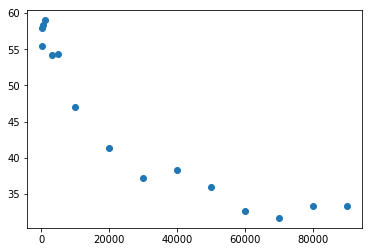

In [34]:
# plot
fig, ax = plt.subplots(1,1)
ax.scatter(x1,y1)
plt.show()

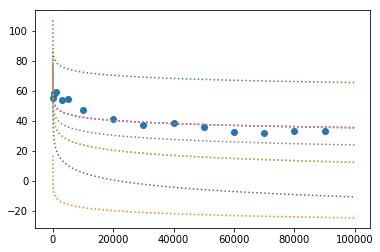

In [55]:
# The fitting equation

def y(x,a,b,c):
    return b*np.log(x**2)+a*np.log(x)+c

x=np.linspace(.1,100_000,1000)
plt.plot(x,y(x,-1.,-1,70),ls=':')
plt.plot(x,y(x,-1.,-1,10),ls=':')
plt.plot(x,y(x,-1.,-1,100),ls=':')

plt.plot(x,y(x,-1.,-1,70),ls=':')
plt.plot(x,y(x,-1.,-2,70),ls=':')
plt.plot(x,y(x,-1.,-3,70),ls=':')

plt.plot(x,y(x,-1.,-1,70),ls=':')
plt.plot(x,y(x,-2.,-1,70),ls=':')
plt.plot(x,y(x,-3.,-1,70),ls=':')

plt.scatter(x1,y1)
plt.show()

In [36]:
# objective function
def objF(v,xexp,yexp):
    a,b,c = v[0],v[1],v[2]
    F=0
    for (xexpi,yexpi) in zip(xexp,yexp):
        F += (yexpi-y(xexpi,a,b,c))**2
    return F
        
a,b,c=-1,-1,50
print(objF([a,b,c],x1,y1))


7554.40220078


# minimization:
> https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html

-2.52523755555 -1.06086866785 86.8489905667


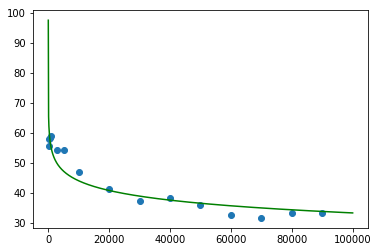

In [46]:
# minimization
from scipy import optimize as opt
ans = opt.minimize(fun= lambda v: objF(v,x1,y1), x0=np.array([a,b,c]), method='Nelder-Mead')
a,b,c = ans['x']
print(a,b,c)

# plot
fig, ax = plt.subplots(1,1)
ax.scatter(x1,y1)
x=np.linspace(.1,100_000,1000)

ax.plot(x,y(x,a,b,c),color='g')

plt.show()
